What's the best way to read in mesa tables?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = 'mesa_models/'
mods = glob.glob('{}*.data'.format(path))
mods

['mesa_models/binary_history_1.0xGR.data',
 'mesa_models/binary_history_2.47xGR.data']

In [3]:
# Table.read(mods[0])

In [4]:
    from nugridpy import mesa as ms

In [5]:
data  = ms.history_data(path, slname = 'binary_history_1.0xGR.data')


Using old binary_history_1.0xGR.datasa file ...


ValueError: could not convert string to float: '"12778"'

In [8]:
data = np.genfromtxt(mods[0], dtype=None, names=True, skip_header=5)
data.dtype.names

('model_number',
 'age',
 'period_days',
 'binary_separation',
 'v_orb_1',
 'v_orb_2',
 'rl_1',
 'rl_2',
 'rl_relative_overflow_1',
 'rl_relative_overflow_2',
 'star_1_mass',
 'star_2_mass',
 'lg_mtransfer_rate',
 'lg_mstar_dot_1',
 'lg_mstar_dot_2',
 'lg_system_mdot_1',
 'lg_system_mdot_2',
 'lg_wind_mdot_1',
 'lg_wind_mdot_2',
 'fixed_xfer_fraction',
 'eff_xfer_fraction',
 'J_orb',
 'Jdot',
 'jdot_mb',
 'jdot_gr',
 'jdot_ml',
 'jdot_ls',
 'jdot_missing_wind',
 'extra_jdot',
 'donor_index',
 'point_mass_index')

Text(10, 2.1, 'Accretion begins')

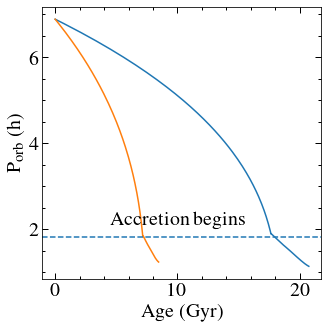

In [19]:
path = 'mesa_models/'
mods = glob.glob('{}*.data'.format(path))
plt.figure(figsize=(5,5))

for mod in mods:
    data = np.genfromtxt(mod, dtype=None, names=True, skip_header=5)
    plt.plot(data['age']/1e9, data['period_days']*24)
plt.xlabel('Age (Gyr)')
plt.ylabel('P$_{\mathrm{orb}}$ (h)')
plt.axhline(1.83, ls='--')
plt.annotate('Accretion begins', (10, 2.1), ha='center')
